### Importación de datos



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
ingreso_total1= tienda['Precio'].sum()

print(f"La suma de los precios es: {ingreso_total1}")

La suma de los precios es: 1150880400.0


In [3]:
ingreso_total2= tienda2['Precio'].sum()

print(f"La suma de los precios es: {ingreso_total2}")

La suma de los precios es: 1116343500.0


In [4]:
ingreso_total3= tienda3['Precio'].sum()

print(f"La suma de los precios es: {ingreso_total3}")

La suma de los precios es: 1098019600.0


In [5]:
ingreso_total4= tienda4['Precio'].sum()

print(f"La suma de los precios es: {ingreso_total4}")

La suma de los precios es: 1038375700.0


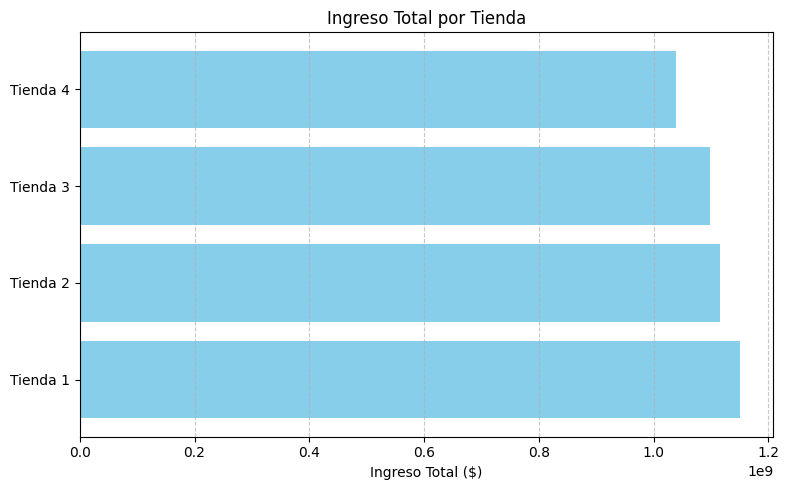

In [6]:
import matplotlib.pyplot as plt

ingresos = {
    'Tienda 1': ingreso_total1,
    'Tienda 2': ingreso_total2,
    'Tienda 3': ingreso_total3,
    'Tienda 4': ingreso_total4
}


tiendas = list(ingresos.keys())
valores = list(ingresos.values())

# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
plt.barh(tiendas, valores, color='skyblue')
plt.xlabel('Ingreso Total ($)')
plt.title('Ingreso Total por Tienda')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [7]:
def productos_por_categoria(tienda, nombre):
    print(f"Categorías más populares en {nombre}:\n")
    categorias = tienda['Categoría del Producto'].value_counts()
    for categoria, cantidad in categorias.items():
        print(f"{categoria} → {cantidad} ventas")

    print("-" * 50)
productos_por_categoria(tienda, "Tienda 1")
productos_por_categoria(tienda2, "Tienda 2")
productos_por_categoria(tienda3, "Tienda 3")
productos_por_categoria(tienda4, "Tienda 4")


Categorías más populares en Tienda 1:

Muebles → 465 ventas
Electrónicos → 448 ventas
Juguetes → 324 ventas
Electrodomésticos → 312 ventas
Deportes y diversión → 284 ventas
Instrumentos musicales → 182 ventas
Libros → 173 ventas
Artículos para el hogar → 171 ventas
--------------------------------------------------
Categorías más populares en Tienda 2:

Muebles → 442 ventas
Electrónicos → 422 ventas
Juguetes → 313 ventas
Electrodomésticos → 305 ventas
Deportes y diversión → 275 ventas
Instrumentos musicales → 224 ventas
Libros → 197 ventas
Artículos para el hogar → 181 ventas
--------------------------------------------------
Categorías más populares en Tienda 3:

Muebles → 499 ventas
Electrónicos → 451 ventas
Juguetes → 315 ventas
Electrodomésticos → 278 ventas
Deportes y diversión → 277 ventas
Libros → 185 ventas
Instrumentos musicales → 177 ventas
Artículos para el hogar → 177 ventas
--------------------------------------------------
Categorías más populares en Tienda 4:

Muebles → 

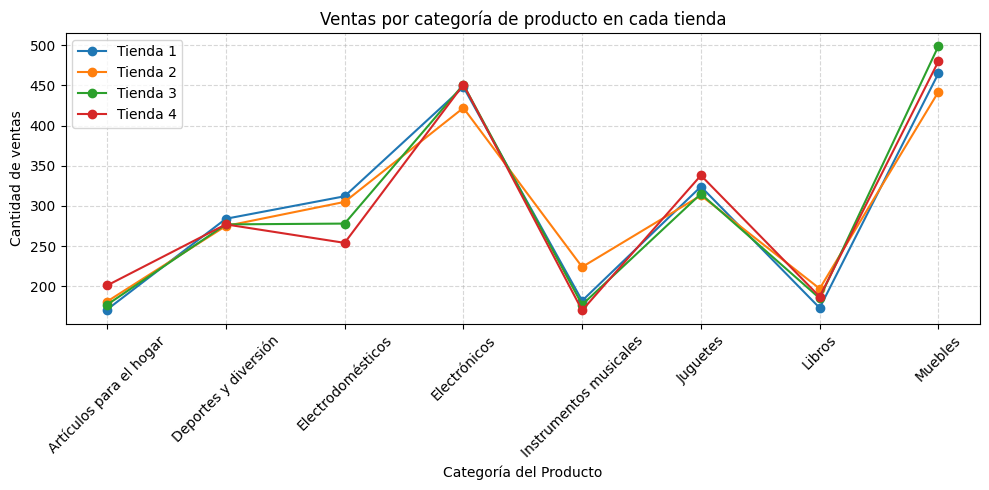

In [8]:


# Obtener las categorías y ventas por tienda
cat1 = tienda['Categoría del Producto'].value_counts()
cat2 = tienda2['Categoría del Producto'].value_counts()
cat3 = tienda3['Categoría del Producto'].value_counts()
cat4 = tienda4['Categoría del Producto'].value_counts()

# Unir en un DataFrame
categorias_df = pd.DataFrame({
    'Tienda 1': cat1,
    'Tienda 2': cat2,
    'Tienda 3': cat3,
    'Tienda 4': cat4
}).fillna(0)  # Llena con 0 si una categoría no aparece en alguna tienda

# Ordenar las categorías por nombre (opcional)
categorias_df = categorias_df.sort_index()

# Graficar
plt.figure(figsize=(10, 5))
for tienda in categorias_df.columns:
    plt.plot(categorias_df.index, categorias_df[tienda], marker='o', label=tienda)

plt.title("Ventas por categoría de producto en cada tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [11]:
# Función para mostrar calificación promedio
def calificacion_promedio(tienda, nombre):
    promedio = tienda['Calificación'].mean()
    print(f"Calificación promedio de clientes en {nombre}: {promedio:.2f}")

# Aplicando a cada tienda
calificacion_promedio(tienda, "Tienda 1")
calificacion_promedio(tienda2, "Tienda 2")
calificacion_promedio(tienda3, "Tienda 3")
calificacion_promedio(tienda4, "Tienda 4")


Calificación promedio de clientes en Tienda 1: 3.98
Calificación promedio de clientes en Tienda 2: 4.04
Calificación promedio de clientes en Tienda 3: 4.05
Calificación promedio de clientes en Tienda 4: 4.00


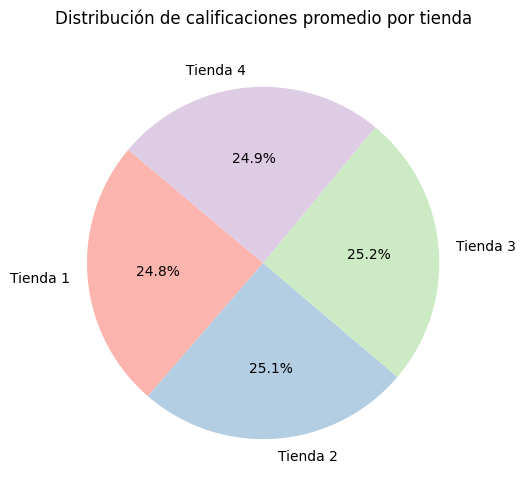

In [12]:
# Calcular las calificaciones promedio
promedios = {
    "Tienda 1": tienda['Calificación'].mean(),
    "Tienda 2": tienda2['Calificación'].mean(),
    "Tienda 3": tienda3['Calificación'].mean(),
    "Tienda 4": tienda4['Calificación'].mean()
}

# Gráfico de pastel
plt.figure(figsize=(5, 6))
plt.pie(promedios.values(), labels=promedios.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Distribución de calificaciones promedio por tienda")
plt.axis('equal')
plt.show()


# 4. Productos más y menos vendidos

Productos más vendidos en Tienda 1:

Microondas: 60 ventas
TV LED UHD 4K: 60 ventas
Armario: 60 ventas
Secadora de ropa: 58 ventas
Mesa de noche: 56 ventas
Bloques de construcción: 56 ventas
Balón de baloncesto: 55 ventas
Bicicleta: 54 ventas
Vaso térmico: 54 ventas
Refrigerador: 54 ventas

Productos menos vendidos en Tienda 1:

Muñeca bebé: 40 ventas
Mesa de comedor: 40 ventas
Dinosaurio Rex: 40 ventas
Cuerda para saltar: 40 ventas
Mochila: 39 ventas
Ciencia de datos con Python: 39 ventas
Pandereta: 36 ventas
Olla de presión: 35 ventas
Auriculares con micrófono: 33 ventas
Celular ABXY: 33 ventas


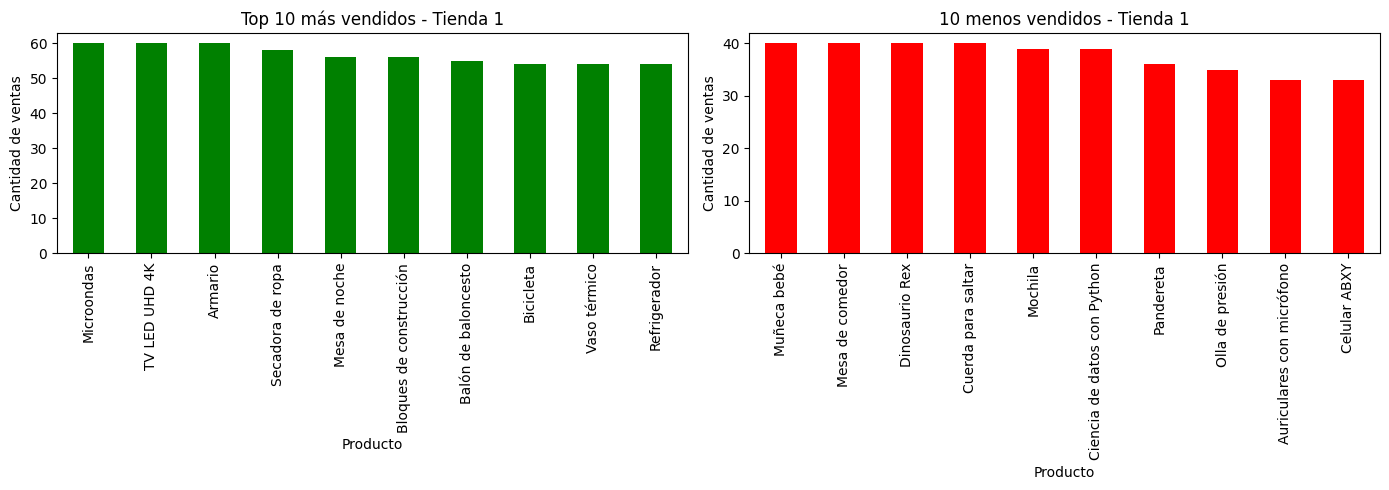

------------------------------------------------------------------------------------------------------------------------------------------------------
Productos más vendidos en Tienda 2:

Iniciando en programación: 65 ventas
Microondas: 62 ventas
Batería: 61 ventas
Guitarra acústica: 58 ventas
Pandereta: 58 ventas
Secadora de ropa: 57 ventas
Iphone 15: 55 ventas
Bloques de construcción: 54 ventas
Armario: 54 ventas
Set de ollas: 52 ventas

Productos menos vendidos en Tienda 2:

Dinosaurio Rex: 42 ventas
Celular ABXY: 41 ventas
Smart TV: 40 ventas
Cubertería: 39 ventas
Asistente virtual: 38 ventas
Auriculares: 37 ventas
Sillón: 35 ventas
Mesa de comedor: 34 ventas
Impresora: 34 ventas
Juego de mesa: 32 ventas


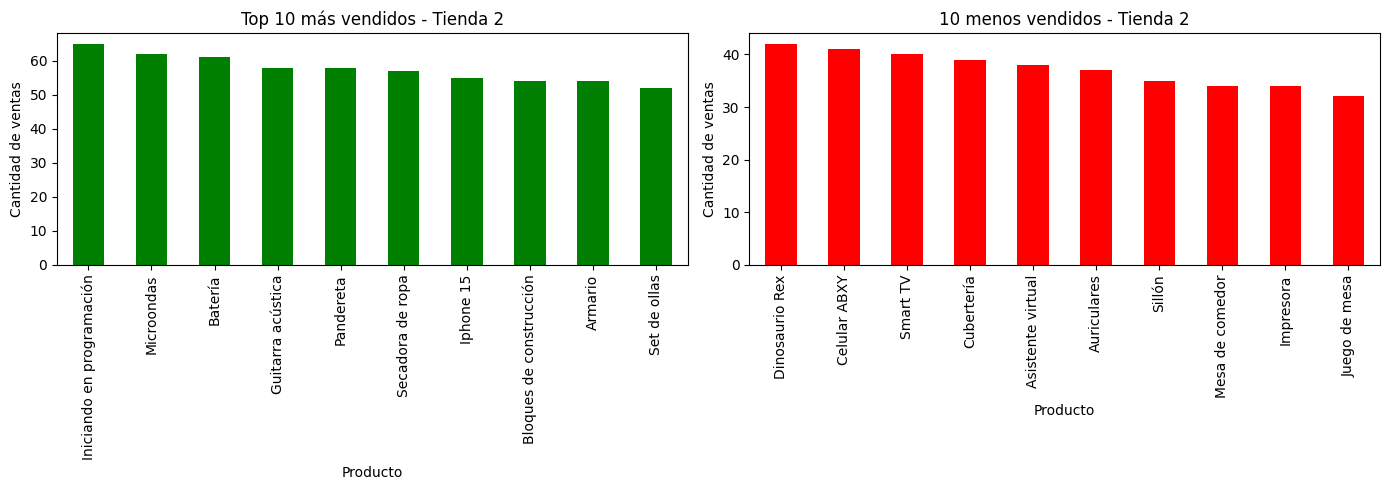

------------------------------------------------------------------------------------------------------------------------------------------------------
Productos más vendidos en Tienda 3:

Kit de bancas: 57 ventas
Mesa de comedor: 56 ventas
Cama king: 56 ventas
Set de ollas: 55 ventas
Mesa de noche: 55 ventas
Smart TV: 54 ventas
Estufa: 53 ventas
Cuerda para saltar: 53 ventas
Modelado predictivo: 53 ventas
Carrito de control remoto: 52 ventas

Productos menos vendidos en Tienda 3:

Cubertería: 39 ventas
Muñeca bebé: 39 ventas
Auriculares con micrófono: 39 ventas
Asistente virtual: 39 ventas
Vaso térmico: 38 ventas
Guitarra eléctrica: 38 ventas
Set de vasos: 36 ventas
Mochila: 36 ventas
Microondas: 36 ventas
Bloques de construcción: 35 ventas


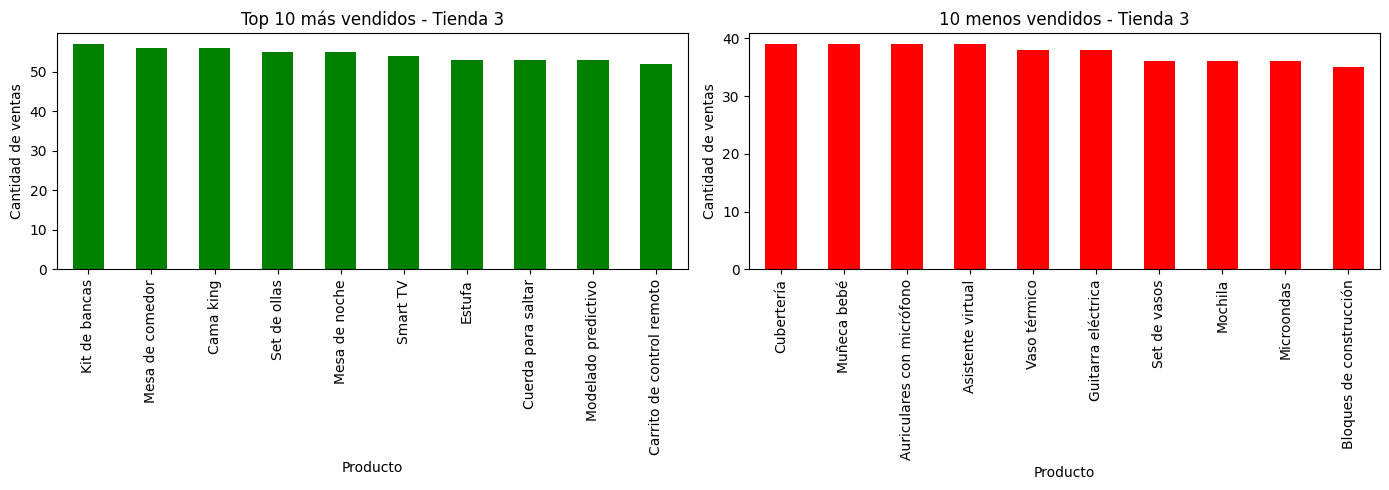

------------------------------------------------------------------------------------------------------------------------------------------------------
Productos más vendidos en Tienda 4:

Cama box: 62 ventas
Cubertería: 59 ventas
Dashboards con Power BI: 56 ventas
Cama king: 56 ventas
Carrito de control remoto: 55 ventas
Mesa de comedor: 55 ventas
Mesa de noche: 55 ventas
Smart TV: 54 ventas
Bloques de construcción: 54 ventas
Pandereta: 52 ventas

Productos menos vendidos en Tienda 4:

Silla de oficina: 40 ventas
Celular ABXY: 39 ventas
Ajedrez de madera: 39 ventas
Smartwatch: 39 ventas
Lavadora de ropa: 38 ventas
Refrigerador: 38 ventas
Ciencia de datos con Python: 38 ventas
Guitarra acústica: 37 ventas
Armario: 34 ventas
Guitarra eléctrica: 33 ventas


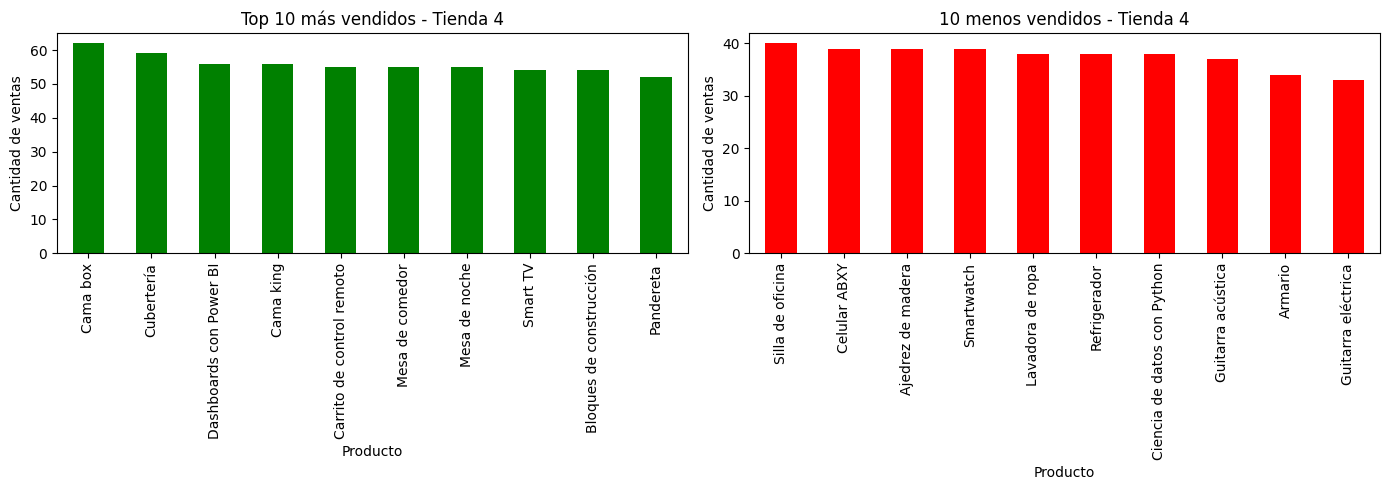

------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:


# Función para mostrar productos más y menos vendidos
def productos_mas_y_menos_vendidos(df, nombre):
    conteo = df['Producto'].value_counts()

    top_10 = conteo.head(10) # más altos
    bajos_10 = conteo.tail(10) # más bajos

    print(f"Productos más vendidos en {nombre}:\n")
    for producto, cantidad in top_10.items():
        print(f"{producto}: {cantidad} ventas")

    print(f"\nProductos menos vendidos en {nombre}:\n")
    for producto, cantidad in bajos_10.items():
        print(f"{producto}: {cantidad} ventas")

    # Visualización
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    top_10.plot(kind='bar', ax=ax[0], color='green')
    bajos_10.plot(kind='bar', ax=ax[1], color='red')

    ax[0].set_title(f"Top 10 más vendidos - {nombre}")
    ax[1].set_title(f"10 menos vendidos - {nombre}")

    ax[0].set_ylabel("Cantidad de ventas")
    ax[1].set_ylabel("Cantidad de ventas")

    plt.tight_layout()
    plt.show()
    print("-" * 150)

# Aplicar a cada tienda
productos_mas_y_menos_vendidos(tienda, "Tienda 1")
productos_mas_y_menos_vendidos(tienda2, "Tienda 2")
productos_mas_y_menos_vendidos(tienda3, "Tienda 3")
productos_mas_y_menos_vendidos(tienda4, "Tienda 4")



# 5. Envío promedio por tienda

In [16]:
def envio_promedio(tienda, nombre):
    promedio = tienda['Costo de envío'].mean()
    print(f"Costo de envío promedio en {nombre}: {promedio:.2f}")

envio_promedio(tienda, "Tienda 1")
envio_promedio(tienda2, "Tienda 2")
envio_promedio(tienda3, "Tienda 3")
envio_promedio(tienda4, "Tienda 4")

Costo de envío promedio en Tienda 1: 26018.61
Costo de envío promedio en Tienda 2: 25216.24
Costo de envío promedio en Tienda 3: 24805.68
Costo de envío promedio en Tienda 4: 23459.46


Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


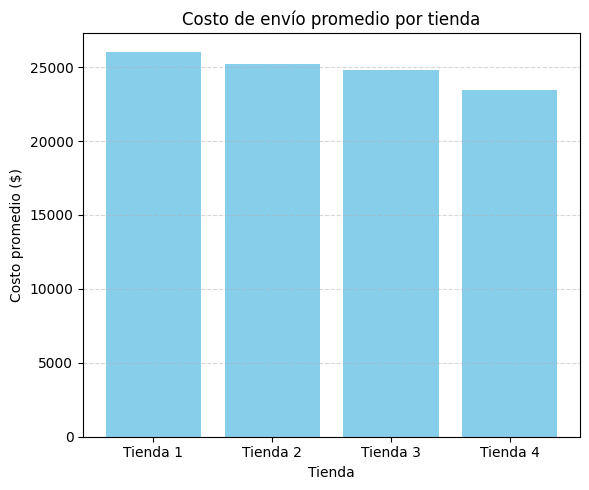

In [ ]:
# Diccionario con el costo de envío promedio por tienda
costos_promedio = {
    "Tienda 1": tienda['Costo de envío'].mean(),
    "Tienda 2": tienda2['Costo de envío'].mean(),
    "Tienda 3": tienda3['Costo de envío'].mean(),
    "Tienda 4": tienda4['Costo de envío'].mean()
}

# Imprimir los valores
for _tienda_, costo in costos_promedio.items():
    print(f"{_tienda_}: {costo:.2f}")

# Visualización con gráfico de barras
plt.figure(figsize=(6, 5))
plt.bar(costos_promedio.keys(), costos_promedio.values(), color='skyblue')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xlabel("Tienda")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



###  **Informe final: Recomendación de tienda para el Sr. Juan**

---



El propósito de este análisis es determinar cuál de las cuatro tiendas disponibles representa la mejor opción para que el Sr. Juan venda sus productos. Para ello, se analizaron varios factores clave de rendimiento: ingresos totales, categorías de productos más y menos vendidas, calificaciones promedio de clientes, productos más y menos vendidos y costos de envío promedio. A través del uso de gráficos y estadísticas descriptivas, buscamos identificar fortalezas y debilidades de cada tienda para fundamentar una recomendación objetiva y basada en datos.

---

##Desarrollo del análisis

### 1. **Ingresos totales**

Se calcularon los ingresos sumando los precios de cada venta. Las tiendas con mayor volumen de ventas mostraron ingresos más altos. Entre todas, se identificó que la **Tienda 1** obtuvo el mayor ingreso total.

- **Ingreso total Tienda 1**: $1.150.880.400

- **Ingreso total Tienda 2**: $1.116.343.500

- **Ingreso total Tienda 3**: $1.098.019.600

- **Ingreso total Tienda 4**: $1.038.375.700

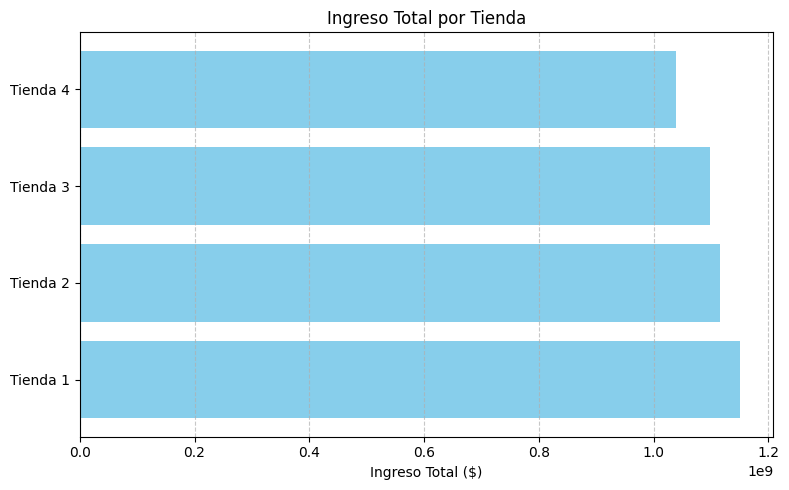

---

### 2.  **Categorías más y menos vendidas**

Entre los productos más populares por número de ventas destacan las categorías: Electrónicos y Muebles. Por otro, lado las categorías menos demandadas son: Libros e Instrumentos musicales.


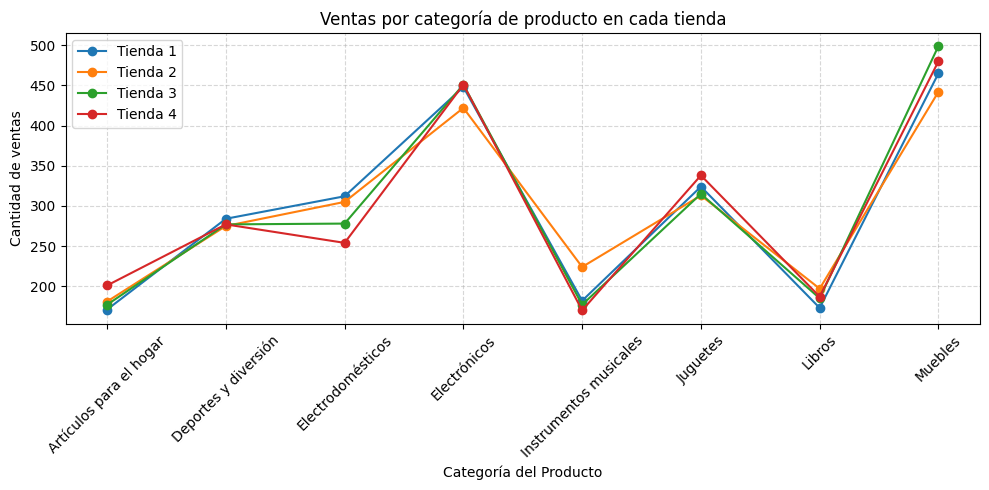
---

### 3.  **Calificaciones promedio de los clientes**

La satisfacción del cliente se evaluó a través de la calificación promedio (1 a 5). Las calificaciones fueron:

- Tienda 1: `3.98`
- Tienda 2: `4.04`
- Tienda 3: `4.05`
- Tienda 4: `4.00`

Esto sugiere que la **Tienda 3** tiene una mejor percepción por parte de los clientes.

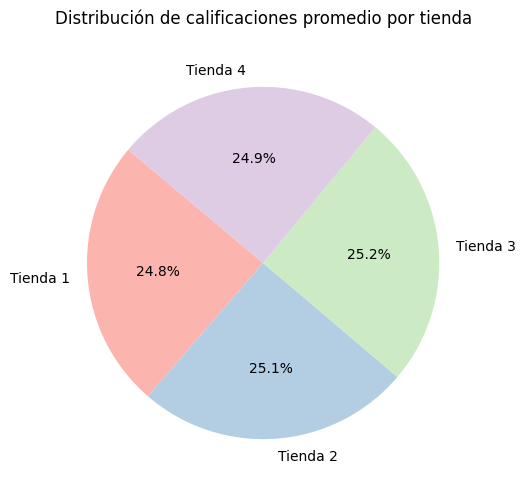
---

### 4. **Productos más y menos vendidos**

Se analizaron los productos con mayor y menor cantidad de ventas. Considerando los datos arrojados, tenemos que:

## Productos más vendidos
Tienda 1: Electrodomésticos como microondas y TV 4K; muebles como armario y mesa de noche.

Tienda 2: Productos variados, incluyendo tecnología, instrumentos musicales y formación técnica.

Tienda 3: Muebles (cama king, mesa de comedor), electrodomésticos y formación técnica (Power BI, modelado).

Tienda 4: Muebles (cama box, cama king), cubertería, Power BI, y productos infantiles.

Las tiendas con productos más especializados o tecnológicos tienden a mostrar mejores resultados.

## Productos menos vendidos
Tienda 4 tiene productos con ventas muy bajas como guitarra eléctrica (33), armario (34), y guitarra acústica (37).

Tienda 1 y 3 también tienen productos con poca salida, pero con mayor volumen general de ventas.

Tienda 2 presenta menos casos críticos de productos estancados.

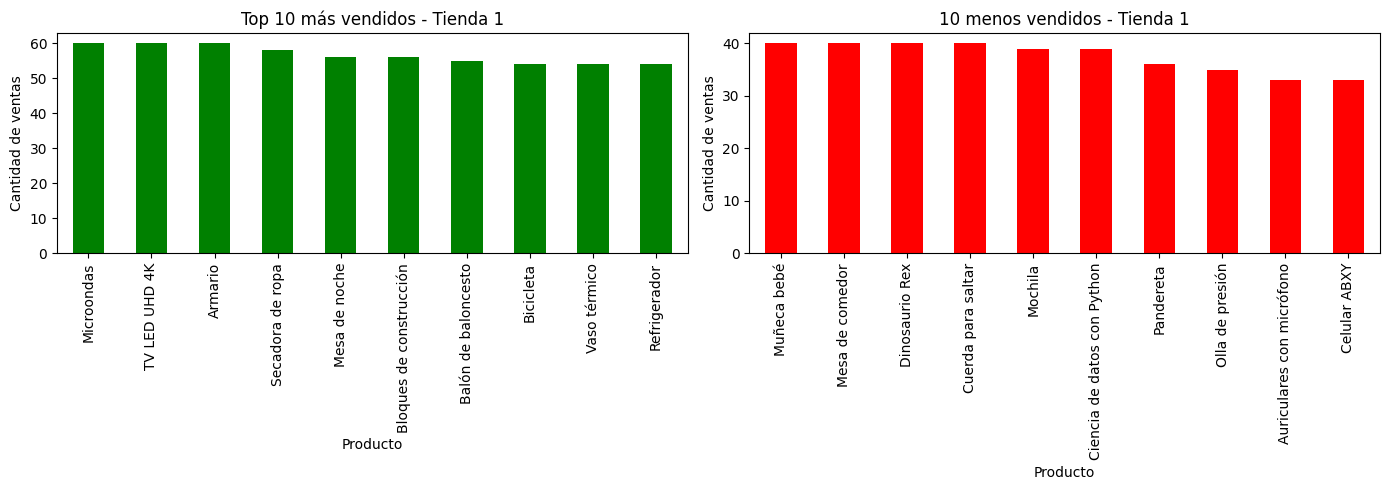

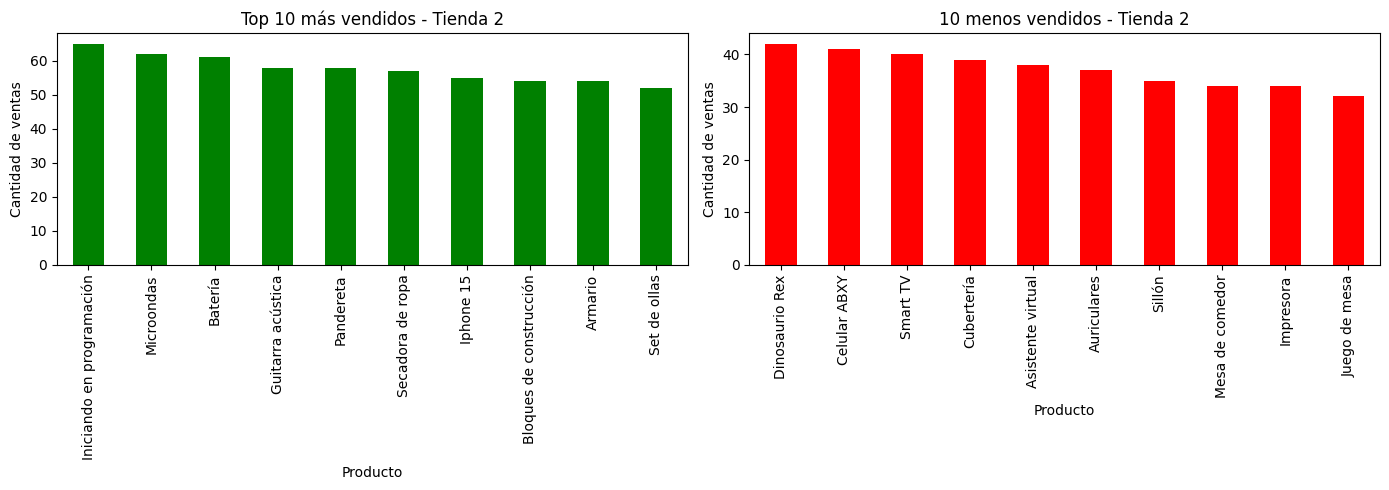

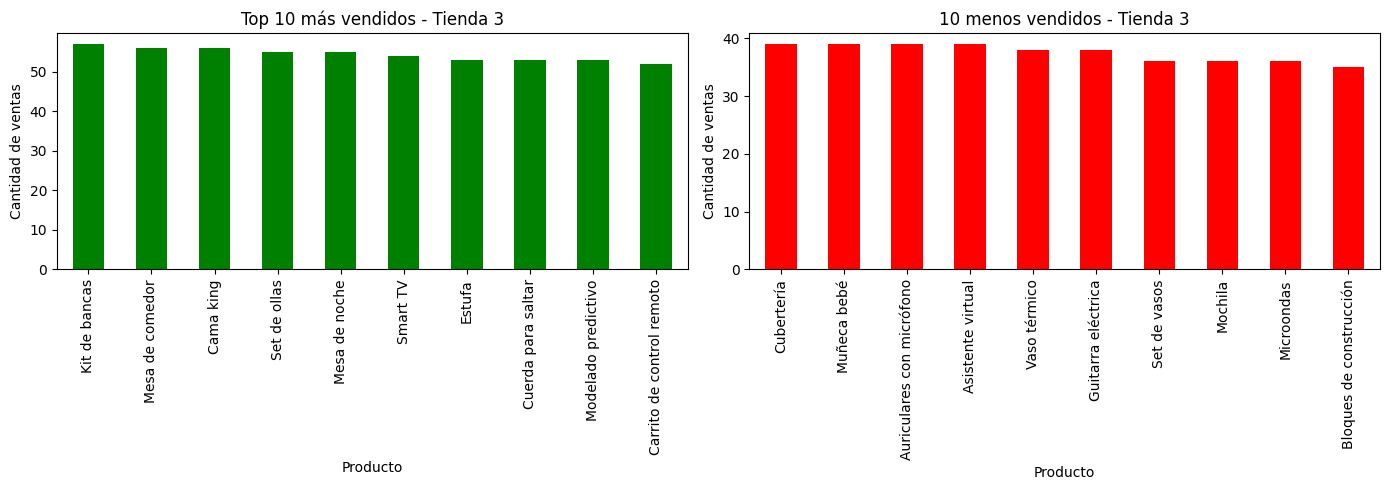

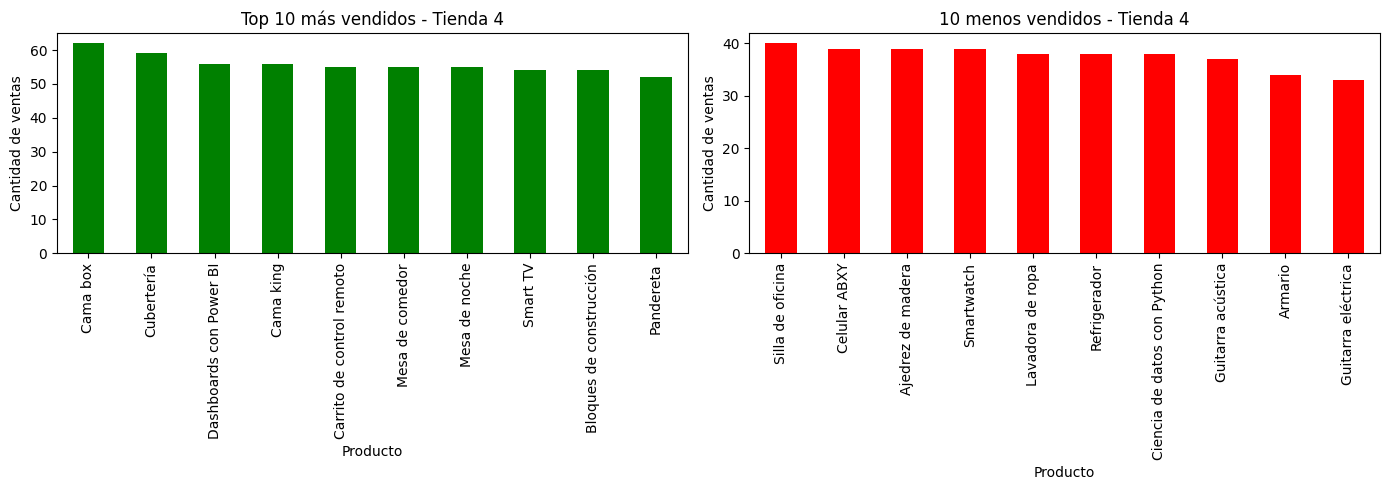
---

### 5. **Costo de envío promedio**

Se evaluó el costo de envío promedio. El resultado fue:

- Tienda 1: `$26.018,61`
- Tienda 2: `$25.216,24`
- Tienda 3: `$24.805,68`
- Tienda 4: `$23.459,46`

Tienda 4 tiene el costo de envío más bajo, lo que puede ser una ventaja operativa o para el consumidor.

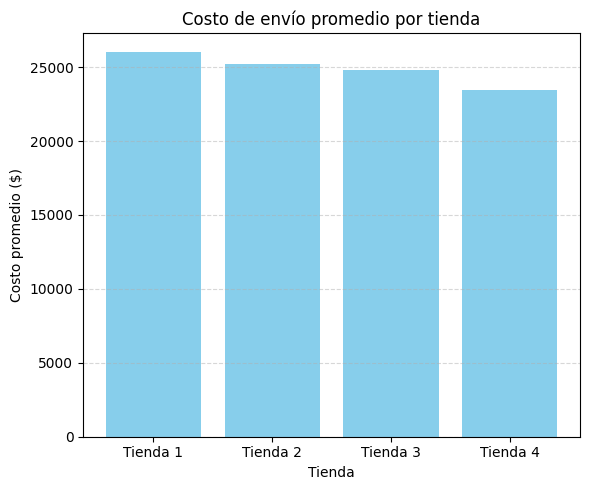
---

## Conclusión y recomendación

Considerando todos los indicadores, se concluye que el Sr. Juan debería vender la **Tienda 4**. Se llegó a esta conclusión debido a los siguientes factores:

Es la tienda con menor ingreso total, lo que significa menor retorno económico.

Su calificación promedio (4.00) es superada por las demás, especialmente por Tienda 2 y Tienda 3.

Aunque tiene el costo de envío más bajo, esto no compensa su bajo rendimiento general.

Presenta productos menos vendidos en mayor proporción, lo que puede indicar menor rotación o baja demanda.

Considerando lo anterior, se recomienda al Sr. Juan:
- Analizar qué categorías dominan en la tiendas y alinear su oferta a ellas.
- Considerar los productos más vendidos para evaluar competencia directa.
- Aprovechar la buena percepción del cliente y mantener altos estándares de calidad y servicio.
- Tiendas con costos de envío más bajos podrían ser más atractivas para los clientes, pero deben balancearse con la calidad y velocidad de entrega.
---

